<a href="https://colab.research.google.com/github/Nas86/Human-Protein-Atlas---Single-Cell-Classification/blob/main/human_protein_atlas_single_cell_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import io
import os
import requests
import pathlib
import gzip
import imageio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import operator

# **Function**

In [ ]:
def tif_gzip_to_png(tif_path):
    '''Function to convert .tif.gz to .png and put it in the same folder
    Eg. for working in local work station
    '''
    png_path = pathlib.Path(tif_path.replace('.tif.gz','.png'))
    tf = gzip.open(tif_path).read()
    img = imageio.imread(tf, 'tiff')
    imageio.imwrite(png_path, img)
    
def download_and_convert_tifgzip_to_png(url, target_path):    
    '''Function to convert .tif.gz to .png and put it in the same folder
    Eg. in Kaggle notebook
    '''
    r = requests.get(url)
    f = io.BytesIO(r.content)
    tf = gzip.open(f).read()
    img = imageio.imread(tf, 'tiff')
    imageio.imwrite(target_path, img)

In [ ]:
# All label names in the public HPA and their corresponding index. 
all_locations = dict({
    "Nucleoplasm": 0,
    "Nuclear membrane": 1,
    "Nucleoli": 2,
    "Nucleoli fibrillar center": 3,
    "Nuclear speckles": 4,
    "Nuclear bodies": 5,
    "Endoplasmic reticulum": 6,
    "Golgi apparatus": 7,
    "Intermediate filaments": 8,
    "Actin filaments": 9,
    "Focal adhesion sites": 9,
    "Microtubules": 10,
    "Mitotic spindle": 11,
    "Centrosome": 12,
    "Centriolar satellite": 12,
    "Plasma membrane": 13,
    "Cell Junctions": 13,
    "Mitochondria": 14,
    "Aggresome": 15,
    "Cytosol": 16,
    "Vesicles": 17,
    "Peroxisomes": 17,
    "Endosomes": 17,
    "Lysosomes": 17,
    "Lipid droplets": 17,
    "Cytoplasmic bodies": 17,
    "No staining": 18
})



In [ ]:
def add_label_idx(df, all_locations):
    '''Function to convert label name to index
    '''
    df["Label_idx"] = None
    for i, row in df.iterrows():
        labels = row.Label.split(',')
        idx = []
        for l in labels:
            if l in all_locations.keys():
                idx.append(str(all_locations[l]))
        if len(idx)>0:
            df.loc[i,"Label_idx"] = "|".join(idx)
            
        print(df.loc[i,"Label"], df.loc[i,"Label_idx"])
    return df

In [ ]:
# public_hpa_df = pd.read_csv('../input/publichpa/kaggle_2021.tsv',names=['in_trainset'])
import pandas as pd
public_hpa_df = pd.read_csv('../input/publichpa-withcellline/kaggle_2021.tsv')

# Remove all images overlapping with Training set
public_hpa_df = public_hpa_df[public_hpa_df.in_trainset == False]

# Remove all images with only labels that are not in this competition
public_hpa_df = public_hpa_df[~public_hpa_df.Label_idx.isna()]

colors = ['blue', 'red', 'green', 'yellow']
celllines = ['A-431', 'A549', 'EFO-21', 'HAP1', 'HEK 293', 'HUVEC TERT2', 'HaCaT', 'HeLa', 'PC-3', 'RH-30', 'RPTEC TERT1', 'SH-SY5Y', 'SK-MEL-30', 'SiHa', 'U-2 OS', 'U-251 MG', 'hTCEpi']
public_hpa_df_17 = public_hpa_df[public_hpa_df.Cellline.isin(celllines)]
len(public_hpa_df), len(public_hpa_df_17)

(77668, 67462)

In [ ]:
public_hpa_df.shape

(77668, 5)

In [ ]:
public_hpa_df.tail()

,Image,Label,Cellline,in_trainset,Label_idx
82490,https://images.proteinatlas.org/9985/68_B8_2,Cytosol,U-251 MG,False,16
82491,https://images.proteinatlas.org/9985/69_B8_1,Cytosol,A-431,False,16
82492,https://images.proteinatlas.org/9985/69_B8_2,Cytosol,A-431,False,16
82493,https://images.proteinatlas.org/9985/91_B8_1,"Mitochondria,Cytosol",U-2 OS,False,14|16
82494,https://images.proteinatlas.org/9985/91_B8_2,"Mitochondria,Cytosol",U-2 OS,False,14|16


In [ ]:
public_hpa_df.isna().sum()

Image          0
Label          0
Cellline       0
in_trainset    0
Label_idx      0
dtype: int64

In [ ]:
public_hpa_df.head(20)

,Image,Label,Cellline,in_trainset,Label_idx
0,https://images.proteinatlas.org/10005/921_B9_1,Cytosol,A-431,False,16
1,https://images.proteinatlas.org/10005/921_B9_2,Cytosol,A-431,False,16
2,https://images.proteinatlas.org/10005/923_B9_1,Cytosol,U-251 MG,False,16
3,https://images.proteinatlas.org/10005/923_B9_2,Cytosol,U-251 MG,False,16
4,https://images.proteinatlas.org/10005/931_B9_1,Cytosol,U-2 OS,False,16
5,https://images.proteinatlas.org/10005/931_B9_2,Cytosol,U-2 OS,False,16
6,https://images.proteinatlas.org/10007/1876_A7_32,Endoplasmic reticulum,ASC TERT1,False,6
7,https://images.proteinatlas.org/10007/1876_A7_37,Endoplasmic reticulum,ASC TERT1,False,6
8,https://images.proteinatlas.org/10007/1901_A10_2,Vesicles,U-2 OS,False,17
9,https://images.proteinatlas.org/10007/1901_A10_3,Vesicles,U-2 OS,False,17


In [ ]:
print('Number of Unique Image:',len(public_hpa_df.Image.unique()))
print('Number of Unique Label:',len(public_hpa_df.Label.unique()))
print('Number of Unique Cellline:',len(public_hpa_df.Cellline.unique()))

Number of Unique Image: 77668
Number of Unique Label: 747
Number of Unique Cellline: 35


In [ ]:
label_list=all_locations.keys()
label_list

dict_keys(['Nucleoplasm', 'Nuclear membrane', 'Nucleoli', 'Nucleoli fibrillar center', 'Nuclear speckles', 'Nuclear bodies', 'Endoplasmic reticulum', 'Golgi apparatus', 'Intermediate filaments', 'Actin filaments', 'Focal adhesion sites', 'Microtubules', 'Mitotic spindle', 'Centrosome', 'Centriolar satellite', 'Plasma membrane', 'Cell Junctions', 'Mitochondria', 'Aggresome', 'Cytosol', 'Vesicles', 'Peroxisomes', 'Endosomes', 'Lysosomes', 'Lipid droplets', 'Cytoplasmic bodies', 'No staining'])

In [ ]:
list_elements = public_hpa_df.Label.str.split(",")
print(list_elements)


0                      [Cytosol]
1                      [Cytosol]
2                      [Cytosol]
3                      [Cytosol]
4                      [Cytosol]
                  ...           
82490                  [Cytosol]
82491                  [Cytosol]
82492                  [Cytosol]
82493    [Mitochondria, Cytosol]
82494    [Mitochondria, Cytosol]
Name: Label, Length: 77668, dtype: object


In [ ]:
from collections import Counter
list_label = []
for elements in list_elements:
    for element in elements:
        list_label.append(element)


print(Counter(list_label))
print(sum(Counter(list_label).values()))


Counter({'Nucleoplasm': 34731, 'Cytosol': 23663, 'Vesicles': 9461, 'Plasma membrane': 7998, 'Mitochondria': 5900, 'No staining': 5456, 'Golgi apparatus': 4710, 'Nucleoli': 4450, 'Nuclear speckles': 2521, 'Nuclear bodies': 2370, 'Endoplasmic reticulum': 2004, 'Centrosome': 1432, 'Nucleoli fibrillar center': 1423, 'Nuclear membrane': 1157, 'Microtubules': 1131, 'Cell Junctions': 1033, 'Actin filaments': 943, 'Intermediate filaments': 582, 'Centriolar satellite': 570, 'Focal adhesion sites': 524, 'Nucleoli rim': 462, 'Cytokinetic bridge': 360, 'Cytoplasmic bodies': 297, 'Mitotic spindle': 193, 'Lipid droplets': 145, 'Aggresome': 140, 'Mitotic chromosome': 135, 'Peroxisomes': 104, 'Midbody': 91, 'Lysosomes': 84, 'Endosomes': 63, 'Midbody ring': 58, 'Rods & Rings': 25, 'Microtubule ends': 17, 'Kinetochore': 8, 'Cleavage furrow': 3})
114244


In [ ]:
import operator
sorted_lable_list = sorted(Counter(list_label).items(), key=operator.itemgetter(1), reverse=True)
df = pd.DataFrame(sorted_lable_list, columns = ['label','count'])
df.head()

,label,count
0,Nucleoplasm,34731
1,Cytosol,23663
2,Vesicles,9461
3,Plasma membrane,7998
4,Mitochondria,5900


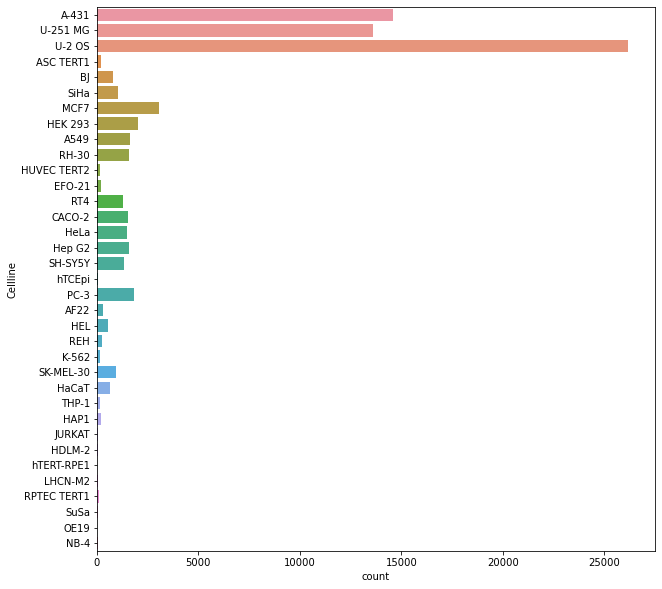

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.countplot(y="Cellline", data=public_hpa_df)
plt.title('Number of Celline For Each Label Within The Dataset')
ax.set(xlabel='Number of Celline in Dataset', ylabel='Celline Names')
plt.show()

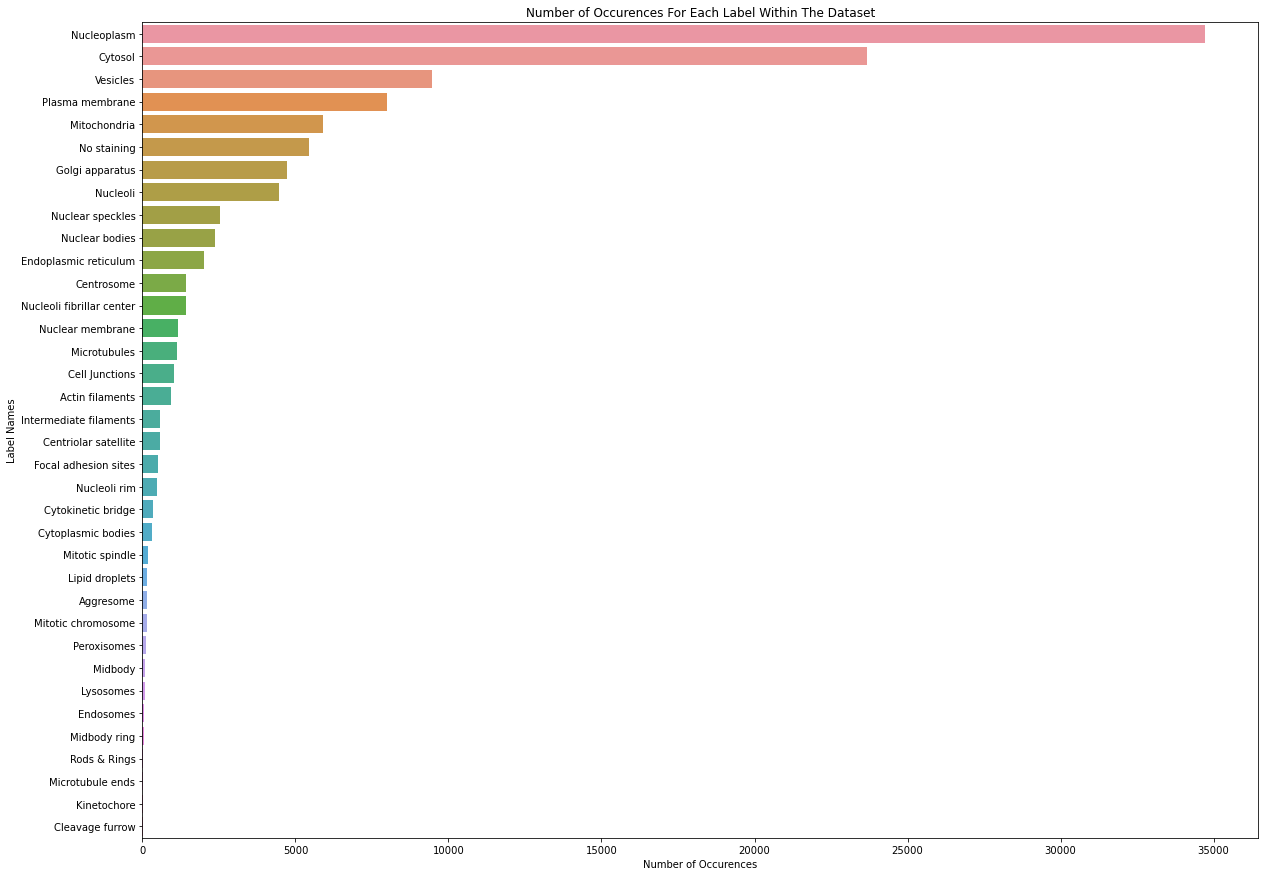

In [ ]:
plt.figure(figsize=(20,15))
ax = sns.barplot(x="count", y="label", data=df)
plt.title('Number of Occurences For Each Label Within The Dataset')
ax.set(xlabel='Number of Occurences', ylabel='Label Names')
plt.show()

In [ ]:
save_dir = os.path.join(os.getcwd(),'publichpa')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
for i, row in public_hpa_df[0:5].iterrows():
    try:
        img = row.Image
        for color in colors:
            img_url = f'{img}_{color}.tif.gz'
            save_path = os.path.join(save_dir,  f'{os.path.basename(img)}_{color}.png')
            download_and_convert_tifgzip_to_png(img_url, save_path)
            print(f'Downloaded {img_url} as {save_path}')    
    except:
        print(f'failed to download: {img}')

Downloaded https://images.proteinatlas.org/10005/921_B9_1_blue.tif.gz as /kaggle/working/publichpa/921_B9_1_blue.png
Downloaded https://images.proteinatlas.org/10005/921_B9_1_red.tif.gz as /kaggle/working/publichpa/921_B9_1_red.png
Downloaded https://images.proteinatlas.org/10005/921_B9_1_green.tif.gz as /kaggle/working/publichpa/921_B9_1_green.png
Downloaded https://images.proteinatlas.org/10005/921_B9_1_yellow.tif.gz as /kaggle/working/publichpa/921_B9_1_yellow.png
Downloaded https://images.proteinatlas.org/10005/921_B9_2_blue.tif.gz as /kaggle/working/publichpa/921_B9_2_blue.png
Downloaded https://images.proteinatlas.org/10005/921_B9_2_red.tif.gz as /kaggle/working/publichpa/921_B9_2_red.png
Downloaded https://images.proteinatlas.org/10005/921_B9_2_green.tif.gz as /kaggle/working/publichpa/921_B9_2_green.png
Downloaded https://images.proteinatlas.org/10005/921_B9_2_yellow.tif.gz as /kaggle/working/publichpa/921_B9_2_yellow.png
Downloaded https://images.proteinatlas.org/10005/923_B9_

In [ ]:
!pip install https://github.com/CellProfiling/HPA-Cell-Segmentation/archive/master.zip

     / 17 kB 290 kB/ss
     / 131 kB 728 kB/s
  Created wheel for hpacellseg: filename=hpacellseg-0.1.8-py3-none-any.whl size=14987 sha256=6d422c01572fc76555c811f3efd9f5d13a03be1b71453c13efce1704a752d638
  Stored in directory: /tmp/pip-ephem-wheel-cache-23jun1rk/wheels/cd/d8/de/04ad08802d62537f8dffc89b6a7ce0a53c3d29ea6eae522ab1
  Created wheel for pytorch-zoo: filename=pytorch_zoo-0.0.0-py3-none-any.whl size=30139 sha256=a7a7747f0a1c88353a23ca02da27ffe4f24c19466ea8f54698076ff5ce9b42ea
  Stored in directory: /tmp/pip-ephem-wheel-cache-23jun1rk/wheels/58/0e/c7/567928a140c7cb2533c59bdc81fded8fe720ea8caad1659d8c
Successfully built hpacellseg pytorch-zoo


In [ ]:
import hpacellseg.cellsegmentator as cellsegmentator
from hpacellseg.utils import label_cell, label_nuclei
import glob

mt = glob.glob(save_dir + '/' + '*_red.png')
er = [f.replace('red', 'yellow') for f in mt]
nu = [f.replace('red', 'blue') for f in mt]
images = [mt, er, nu]


NUC_MODEL = "./nuclei-model.pth"
CELL_MODEL = "./cell-model.pth"
segmentator = cellsegmentator.CellSegmentator(
    NUC_MODEL,
    CELL_MODEL,
    scale_factor=0.25,
    device="cuda",
    padding=False,
    multi_channel_model=True,
)

# For nuclei
nuc_segmentations = segmentator.pred_nuclei(images[2])

# For full cells
cell_segmentations = segmentator.pred_cells(images)

# post-processing
for i, pred in enumerate(cell_segmentations):
    nuclei_mask, cell_mask = label_cell(nuc_segmentations[i], cell_segmentations[i])
    FOVname = os.path.basename(mt[i]).replace('red','predictedmask')
    imageio.imwrite(os.path.join(save_dir,FOVname), cell_mask) 

In [ ]:
# Visualizing the segmentation masks we just predicted above

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(20,50))
for i in range(3):
    microtubule = plt.imread(mt[i])    
    endoplasmicrec = plt.imread(er[i])    
    nuclei = plt.imread(nu[i])
    mask = plt.imread(mt[i].replace('red','predictedmask'))
    img = np.dstack((microtubule, endoplasmicrec, nuclei))
    ax[i].imshow(img)
    ax[i].imshow(mask, alpha=0.5)
    ax[i].axis('off')
plt.show()